<a href="https://colab.research.google.com/github/Nilufayeasmin299/Phishig-detection-using-both-machine-learning-and-deep-learning-techniques/blob/main/Ensemble_ML_Phishing_detection_ML_After_Before_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # **Loading Data**

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/Second paper/Dataset/URL-Dataset.csv')
#data0 = pd.read_csv('/content/drive/MyDrive/Research_Paper_code/Phishig-detection-using-both-machine-learning-and-deep-learning-techniques-main/new_data.csv')
data0.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


# **Familiarizing with Data**

In [ ]:
#Checking the shape of the dataset
data0.shape

(11055, 31)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
#Finding out the distribution of the class labels
from collections import Counter

classes = Counter(data0['Result'].values)
classes.most_common()

[(1, 6157), (0, 4898)]

In [ ]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,0,4898


# **Visualizing the data**

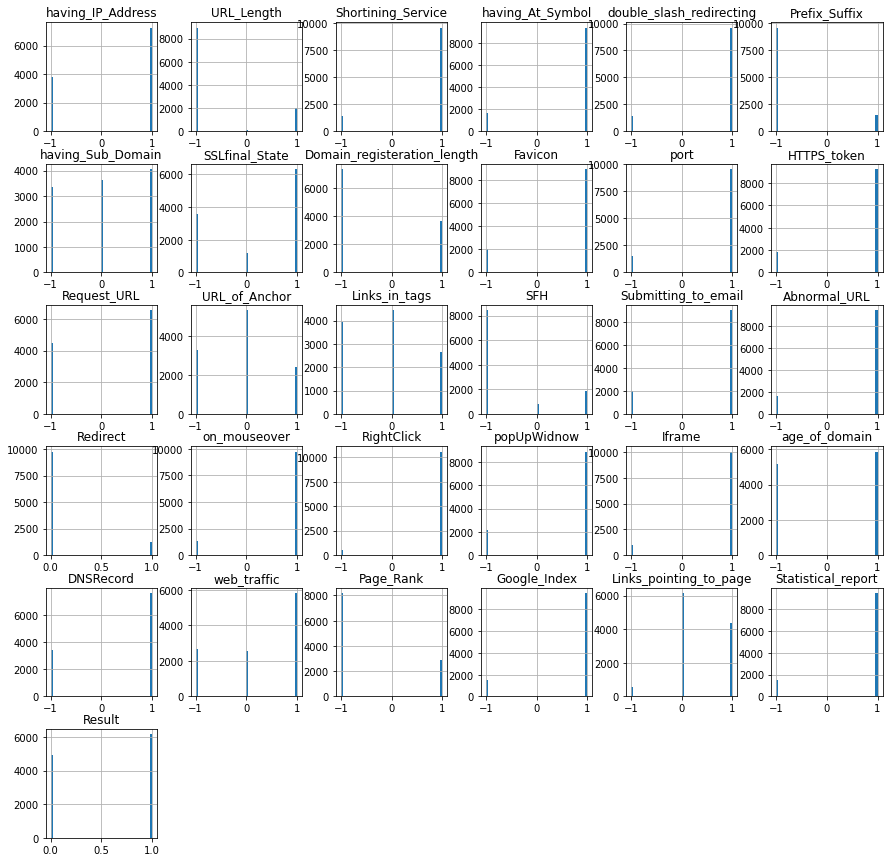

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

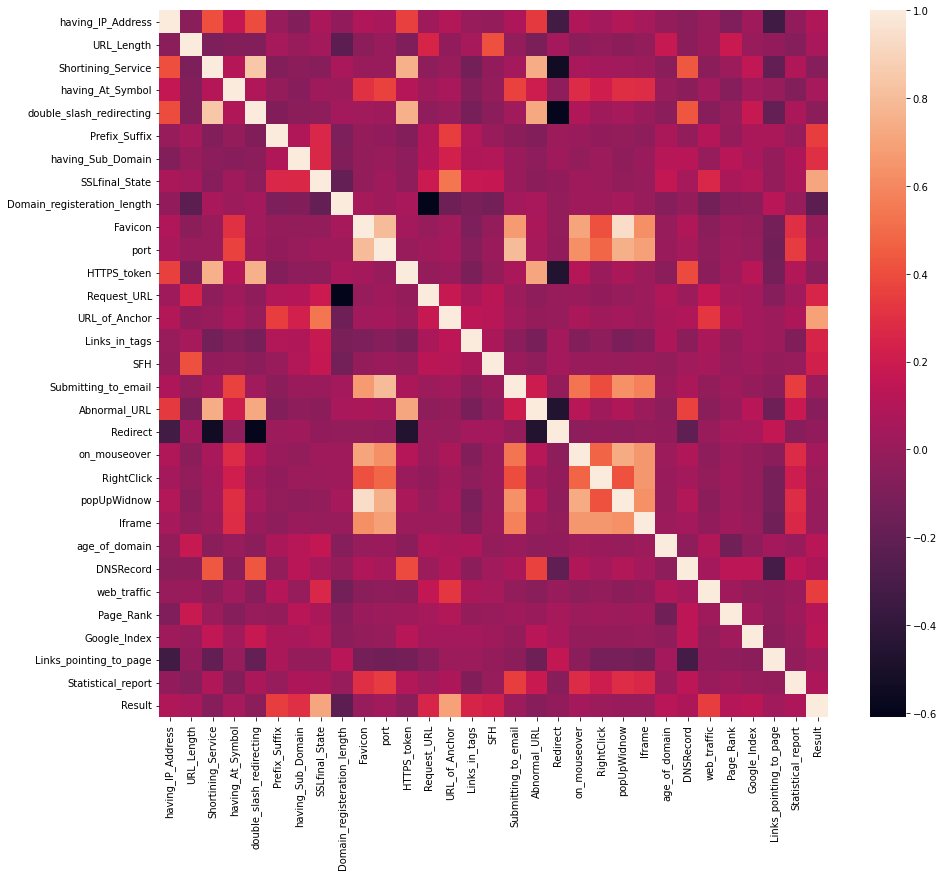

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **Data Preprocessing & EDA**

In [ ]:
data0.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.556943
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.496769
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dropping the Domain column
#data = data0.drop(['Domain'], axis = 1).copy()
data=data0

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,1,1,-1,1,1,1,-1,1,1,-1,0,0,1,1,1,0,-1,1,-1,1,1,-1,1,-1,-1,0,1,1
1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,1,1,0,1,1,-1,1,-1,-1,-1,-1,1,0,1,0
2,-1,1,1,1,1,-1,1,1,-1,1,1,1,1,0,1,-1,1,1,1,1,1,1,1,1,1,0,-1,1,1,-1,0
3,-1,-1,-1,1,1,-1,0,0,-1,1,1,-1,-1,-1,1,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,0
4,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,0


# **Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((11055, 30), (11055,))

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X) 
y_train=y

In [ ]:
# Applying k-Fold Cross Validation 
from sklearn import model_selection
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score, make_scorer
scoring={'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score),
         'recall':make_scorer(recall_score),'f1':make_scorer(f1_score)}

## Define ensemble models

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
# instantiate the model 
tree = DecisionTreeClassifier()#max_depth = 5)

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
forest = RandomForestClassifier()#max_depth=5)

In [ ]:
#adaboost model
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()#n_estimators=5,learning_rate=1)

In [ ]:
# SVM model 
from sklearn.svm import SVC 
# instantiate the model 
svm = SVC()#kernel='linear', C=1.0, random_state=12)

In [ ]:
# K-nearest neighbors model 
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model 
knn=KNeighborsClassifier()

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
# instantiate the model 
xgb = XGBClassifier()#learning_rate=0.4,max_depth=7)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


m = VotingClassifier(
    estimators=[
                ('dt', tree), 
                ('rf', forest), 
                ('ada', ada),
                ('svm',svm),
                ('knn',knn),
                #('xgb',xgb)
                ], 
    voting='hard')

In [ ]:
import time
p=0
tme=0
tic=time.perf_counter()

In [ ]:
#applying kfold cross validation on model
results_dt = model_selection.cross_validate(m.fit(X_train,y_train),
                                          X=X_train,
                                          y=y_train,
                                          cv=10,
                                          scoring=scoring)

In [ ]:
p=time.perf_counter()
tme=p-tic

In [ ]:
acc=np.mean(results_dt['test_accuracy'])
acc_err=np.std(results_dt['test_accuracy'])
pre=np.mean(results_dt['test_precision'])
pre_err=np.std(results_dt['test_precision'])
rec=np.mean(results_dt['test_recall'])
rec_err=np.std(results_dt['test_recall'])
f1=np.mean(results_dt['test_f1'])
f1_err=np.std(results_dt['test_f1'])

In [ ]:
print('Cross Validation accuracy: %.4f +/- %.4f' % (acc,acc_err))
print('Precision: %.4f +/- %.4f' % (pre,pre_err))
print('Recall: %.4f +/- %.4f' % (rec,rec_err))
print('F1 Score: %.4f +/- %.4f' % (f1,f1_err)) 
print('execution time: %.4f sec'% (tme))

Cross Validation accuracy: 0.9680 +/- 0.0043
Precision: 0.9628 +/- 0.0092
Recall: 0.9805 +/- 0.0059
F1 Score: 0.9715 +/- 0.0037
execution time: 40.2862 sec
